<a href="https://colab.research.google.com/github/pablogarridoponce/Machine-Learning-with-Python-Project/blob/master/DL0321EN_4_1_Comparing_Models_py_v1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [ ]:
## get the data
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

--2020-08-02 07:13:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261483817 (249M) [application/zip]
Saving to: ‘concrete_data_week4.zip’

concrete_data_week4 100%[===================>] 249.37M  29.3MB/s    in 9.1s    

2020-08-02 07:14:08 (27.3 MB/s) - ‘concrete_data_week4.zip’ saved [261483817/261483817]



In [ ]:
!unzip concrete_data_week4.zip

Streaming output truncated to the last 5000 lines.
  inflating: concrete_data_week4/train/negative/08835.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._08835.jpg  
  inflating: concrete_data_week4/train/negative/08821.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._08821.jpg  
  inflating: concrete_data_week4/train/negative/03974.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._03974.jpg  
  inflating: concrete_data_week4/train/negative/12879.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._12879.jpg  
  inflating: concrete_data_week4/train/negative/09281.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._09281.jpg  
  inflating: concrete_data_week4/train/negative/10908.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._10908.jpg  
  inflating: concrete_data_week4/train/negative/01805.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._01805.jpg  
  inflating: concrete_data_week4

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [ ]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

!ls concrete_data_week4


test  train  valid


In [ ]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)
train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.


In [ ]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)
validation_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 9501 images belonging to 2 classes.


In [ ]:
print('\ntrain generator size : {} \nvalidation generator size : {}'.format(len(train_generator), len(validation_generator)))


train generator size : 301 
validation generator size : 96


In [ ]:
model = Sequential()
model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
model.add(Dense(num_classes, activation='softmax'))
model.layers

In [ ]:
model.layers[0].layers

In [ ]:
model.layers[0].trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

In [ ]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

from google.colab import drive
drive.mount('/content/drive')

model.save('classifier_vgg16_model.h5')

Epoch 1/2
301/301 [==============================] - 216s 718ms/step - loss: 0.0812 - accuracy: 0.9727 - val_loss: 0.0122 - val_accuracy: 0.9952
Epoch 2/2
301/301 [==============================] - 208s 689ms/step - loss: 0.0168 - accuracy: 0.9961 - val_loss: 0.0111 - val_accuracy: 0.9966
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [ ]:
#load vgg16 pretrained model with augmented data
from keras.models import load_model
pretrained_vgg16_model = load_model('/content/classifier_vgg16_model_5.h5') #this was my best accured model,but it´s not significant because only 2 neurons were added.
pretrained_vgg16_model.layers


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [ ]:
pretrained_vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 14,715,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#preparing test data
num_classes = 2

image_resize = 224

batch_size_test = 50
batch_size_training = 100
batch_size_validation = 100

data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)
test_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_test,
    shuffle=False)

!ls concrete_data_week4/test

Found 500 images belonging to 2 classes.
negative  positive


In [ ]:
#evaluation vgg16 pretrained model with test data
scores_vgg16 = pretrained_vgg16_model.evaluate_generator(test_generator, verbose=1)
print('Accuracy vgg16 model: {}% \nError vgg16 model: {}%'.format(scores_vgg16[1]*100, (1 - scores_vgg16[1])*100))    

10/10 [==============================] - 7s 695ms/step
Accuracy vgg16 model: 99.59999918937683% 
Error vgg16 model: 0.40000081062316895%


In [ ]:
#load resnet50 pretrained model with augmented data
pretrained_resnet50_model = load_model('/content/classifier_resnet50_model_3.h5') #this was my best accured model,but it´s not significant because only 2 neurons were added.
pretrained_resnet50_model.layers


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [ ]:
pretrained_resnet50_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
#evaluation resnet50 pretrained model with test data
scores_resnet50 = pretrained_resnet50_model.evaluate_generator(test_generator, verbose=1)
print('Accuracy resnet 50 model: {}% \nError resnet 50 model: {}%'.format(scores_resnet50[1]*100, (1 - scores_resnet50[1])*100)) 

10/10 [==============================] - 5s 537ms/step
Accuracy resnet 50 model: 95.39999961853027% 
Error resnet 50 model: 4.600000381469727%


<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [ ]:
#predictions using vgg16 and resnet50 - predict_generator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
target_pred_vgg16 = pretrained_vgg16_model.predict_generator(test_generator,verbose=1)
target_pred_resnet50 = pretrained_resnet50_model.predict_generator(test_generator,verbose=1)

10/10 [==============================] - 4s 423ms/step


In [ ]:
#predictions normalization
vgg16_image_pred=np.round(target_pred_vgg16)
resnet50_image_pred=np.round(target_pred_resnet50)

In [ ]:
#predictions analysis
batch_test=[]
vgg16_batch=[]
resnet50_batch=[]
acc_vgg16=0
acc_resnet50=0
label=[]
false_negative_vgg16=[] ; false_positive_vgg16=[] ; true_positive_vgg16=[] ; true_negative_vgg16=[]
false_negative_resnet50=[] ; false_positive_resnet50=[] ; true_positive_resnet50=[] ; true_negative_resnet50=[]
bn=0
for bn in range(0,10):
    bs=0 
    batch_test = test_generator.next()
    vgg16_batch = vgg16_image_pred[(50*bn):(50+50*bn)]
    resnet50_batch = resnet50_image_pred[(50*bn):(50+50*bn)]
    if bn == 0:
          first_test_images=batch_test[0]
          first_test_labels=batch_test[1]
    if bn == 1:
          second_test_images=batch_test[0]
          second_test_labels=batch_test[1]
    if bn == 6:
          seventh_test_images=batch_test[0]
          seventh_test_labels=batch_test[1]
    for bs in range(0,batch_size_test):
          label=batch_test[1][bs]    
          if label[1] == 1: 
                if batch_test[1][bs][1] == vgg16_batch[bs][1]:
                      true_positive_vgg16.append(bs)
                      acc_vgg16 +=1
                else:
                      false_positive_vgg16.append([bn,bs])
                if batch_test[1][bs][1] == resnet50_batch[bs][1]:
                      true_positive_resnet50.append(bs)
                      acc_resnet50 +=1
                else:
                      false_positive_resnet50.append([bn,bs])
          if label[1] == 0: 
                if batch_test[1][bs][1] == vgg16_batch[bs][1]:
                      true_negative_vgg16.append(bs)
                      acc_vgg16 +=1
                else:
                      false_negative_vgg16.append([bn,bs])
                if batch_test[1][bs][1] == resnet50_batch[bs][1]:
                      true_negative_resnet50.append(bs)
                      acc_resnet50 +=1
                else:
                      false_negative_resnet50.append([bn,bs])     
print(acc_vgg16)
print(acc_resnet50)

498
477


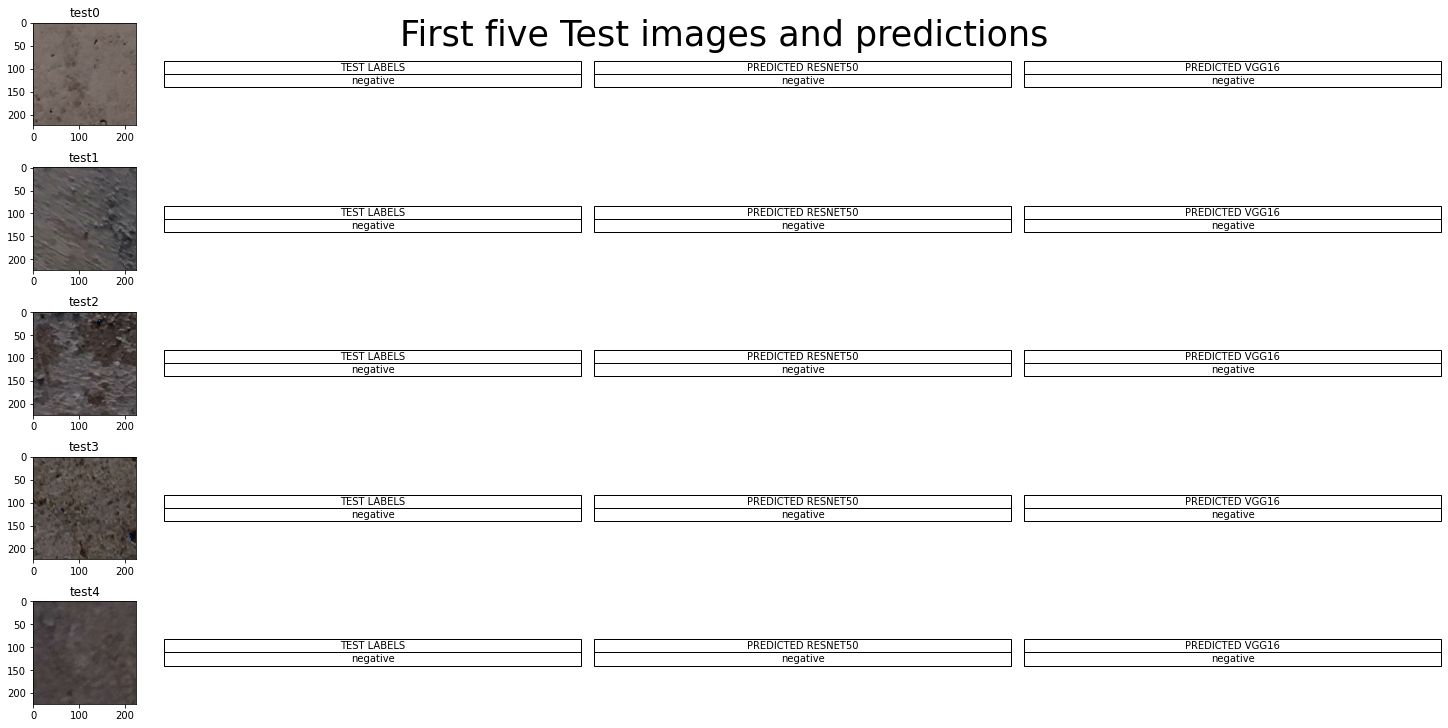

In [ ]:
#report required by LAB assignment
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec

rows_report=5  # define rows to build report
cols_report=4   # define columns to build report
width_rat=[4,8,8,8]  # define width ratio between columns in report grid
height_rat=[1]*5  # define height ratio between rows in report grid
ind = 0

fig1 = plt.figure(constrained_layout=True)
fig1.suptitle('First five Test images and predictions', va='top', fontsize=35)
gs = gridspec.GridSpec(rows_report, cols_report, figure=fig1, width_ratios=width_rat, height_ratios=height_rat) # define a grid to deploy images and class data

for i in range(0,rows_report):
        ax1=fig1.add_subplot(gs[i,0])
        fig = plt.gca()
        fig = plt.gcf()
        fig.set_size_inches(20,10)    
        image_data = first_test_images[ind].astype(np.uint8)
        plt.imshow(image_data)
        plt.title("test"+str(ind))
        cell_text = []
        if first_test_labels[ind][1]==1.: 
           cell_text.append([['positive']])
        else:
           cell_text.append([['negative']])
        if resnet50_image_pred[ind][1]==1.: 
           cell_text.append([['positive']])
        else:
           cell_text.append([['negative']])
        if vgg16_image_pred[ind][1]==1.: 
           cell_text.append([['positive']])
        else:
            cell_text.append([['negative']])
        ind += 1
    
        ax2 = fig1.add_subplot(gs[i,1])
        fig = plt.gca()
        fig = plt.gcf()
        fig.set_size_inches(20,10)
        plt.table(cellText=cell_text[0],colLabels=['TEST LABELS'], colWidths=[1.5]*1, loc='center', cellLoc='center')
        plt.axis('off')

        ax3 = fig1.add_subplot(gs[i,2])
        fig = plt.gca()
        fig = plt.gcf()
        fig.set_size_inches(20,10)
        plt.table(cellText=cell_text[1], colLabels=['PREDICTED RESNET50'], colWidths=[1.5]*1, loc='center', cellLoc='center')
        plt.axis('off')

        ax4 = fig1.add_subplot(gs[i,3])
        fig = plt.gca()
        fig = plt.gcf()
        fig.set_size_inches(20,10)
        plt.table(cellText=cell_text[2], colLabels=['PREDICTED VGG16'], colWidths=[1.5]*1, loc='center',cellLoc='center')
        plt.axis('off')


In [ ]:
#Accuracy and test result obtanined
report_df=pd.DataFrame()
report_df['MODELS']=['RESNET50','VGG16']
report_df['ACCURACY EVALUATE_GENERATOR'] = [(str(scores_resnet50[1]*100)+'%'),(str(scores_vgg16[1]*100)+'%')]
report_df['ACCURACY PREDICT_GENERATOR'] = [(str(acc_resnet50/500*100)+'%'),(str(acc_vgg16/500*100)+'%')]
report_df['TRUE POSITIVE'] = [len(true_positive_resnet50),len(true_positive_vgg16)]
report_df['TRUE NEGATIVE'] = [len(true_negative_resnet50),len(true_negative_vgg16)]
report_df['FALSE POSITIVE'] = [len(false_positive_resnet50),len(false_positive_vgg16)]
report_df['FALSE NEGATIVE'] = [len(false_negative_resnet50),len(false_negative_vgg16)]
report_df

,MODELS,ACCURACY EVALUATE_GENERATOR,ACCURACY PREDICT_GENERATOR,TRUE POSITIVE,TRUE NEGATIVE,FALSE POSITIVE,FALSE NEGATIVE
0,RESNET50,95.39999961853027%,95.39999999999999%,227,250,23,0
1,VGG16,99.59999918937683%,99.6%,249,249,1,1


Text(0.5, 1.0, 'vgg16 false negative')

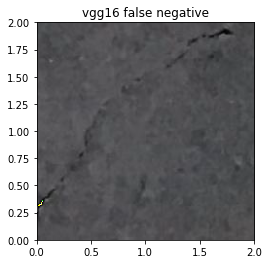

In [ ]:
plt.imshow(second_test_images[9].astype(np.uint8), extent=[0,2,0,2])
plt.title("vgg16 false negative")

Text(0.5, 1.0, 'vgg16 false positive')

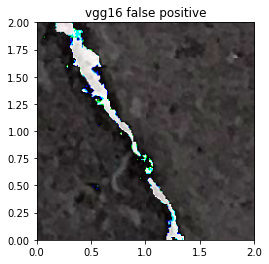

In [ ]:
plt.imshow(seventh_test_images[42].astype(np.uint8), extent=[0,2,0,2])
plt.title("vgg16 false positive")

Comments and conclusions: 
1) Both model performance similar, but vgg16 obtained better accuracy result than resnet50 model. 
2) Training epochs effect over accuracy are not signifficant . Both models were trained ten times (10 epochs) and not significative improvement was observed.
3)That is consistent with the size of the pre-trained models, with millions of parameters pre-trained and only a few miles of new parameters as data agreggated, so the result observed is consistent.
4) The Accuracy between evaluate_generator method and predict_generator was correlated and no significative difference was found.
5) About the models, resnet50 has 50 hidden layer and vgg16 has only 16, nevertheless vgg16 had performanced better. Probably the differences between both of them are the convolutional layers.
6) About false positive and false negative, we can observe that resnet50 model has got error predictions mainly on detect image with cracks (positive image)
7) This tendence to make errors with cracked images looks like a sistematic error, so maybe there is a reason in the convolutional layer that not recongnize well the crack feature. 
8) Vgg16 model only make a mistakes on two predicted images, one with crack and another without it. One image looks like digitally broken or may correspond to a reparired crack.
9) If we analize the images where vgg16 model was wrong, we can observe that is difficult to predict the class even for a human, so we can conclude the model is very confidence detecting cracks. 

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).